### OP - Analysis of Sales and Valuation Data 2024/25

#### System Setup

In [44]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [45]:
# importing dataset

df = pd.read_csv('all_sales_data_24_25.csv')
df = df.drop(0)
df = df.reset_index(drop = True)
df.head()


,SALE No.,DESPATCH DATE,GRADE,Unnamed: 3,Unnamed: 4,QTY,VALUE,QTY.1,Vlu P,Vlu pro,PROCEEDS,Asking P,Asking Pro,Def,Last bid
0,14.0,02.04.2024,NVK,2047,OP1,350,3600.0,350.0,3500.0,1225000.0,1260000,NaN,NaN,NaN,NaN
1,14.0,02.04.2024,NaN,2048,OP1,680,1950.0,680.0,2000.0,1360000.0,1326000,NaN,NaN,NaN,NaN
2,14.0,02.04.2024,NaN,2075,OP1,640,1800.0,640.0,1900.0,1216000.0,1152000,NaN,NaN,NaN,NaN
3,14.0,02.04.2024,NaN,2073,OP,640,1460.0,640.0,1500.0,960000.0,934400,NaN,NaN,NaN,NaN
4,14.0,02.04.2024,NaN,2066,OPA,520,1460.0,520.0,1450.0,754000.0,759200,NaN,NaN,NaN,NaN


In [46]:
df = df.drop(['GRADE','Unnamed: 3','Def','Last bid'],axis=1)
df = df.rename(columns = {
    'SALE No.' : 'Sale_No.',
    'Unnamed: 4' : 'Grade',
    'DESPATCH DATE' : 'Despatch_Date',
    'QTY' : 'Actual_Quantity',
    'VALUE' : 'Actual_Price',
    'QTY.1' : 'Valuation_Quantity',
    'Vlu P' : 'Valuation_Price',
    'Vlu pro' : 'Valuation_Proceeds',
    'PROCEEDS' : 'Actual_Proceeds',
    'Asking P' : 'Asking_Price',
    'Asking Pro' : 'Asking_Proceeds'
    })

In [47]:
df = df[df['Grade'] == 'OP']
df.head()

,Sale_No.,Despatch_Date,Grade,Actual_Quantity,Actual_Price,Valuation_Quantity,Valuation_Price,Valuation_Proceeds,Actual_Proceeds,Asking_Price,Asking_Proceeds
3,14.0,02.04.2024,OP,640,1460.0,640.0,1500.0,960000.0,934400,NaN,NaN
40,15.0,16.04.2024,OP,280,1600.0,280.0,1450.0,406000.0,448000,NaN,NaN
41,15.0,16.04.2024,OP,320,1480.0,320.0,1450.0,464000.0,473600,NaN,NaN
65,15.0,16.04.2024,OP,500,1340.0,500.0,1200.0,600000.0,670000,NaN,NaN
81,16.0,22.04.2024,OP,NaN,NaN,640.0,1480.0,947200.0,0,NaN,NaN


In [48]:
dfw = df.copy() # dfw refers to dataframe_working (dfw)
dfw.head()

,Sale_No.,Despatch_Date,Grade,Actual_Quantity,Actual_Price,Valuation_Quantity,Valuation_Price,Valuation_Proceeds,Actual_Proceeds,Asking_Price,Asking_Proceeds
3,14.0,02.04.2024,OP,640,1460.0,640.0,1500.0,960000.0,934400,NaN,NaN
40,15.0,16.04.2024,OP,280,1600.0,280.0,1450.0,406000.0,448000,NaN,NaN
41,15.0,16.04.2024,OP,320,1480.0,320.0,1450.0,464000.0,473600,NaN,NaN
65,15.0,16.04.2024,OP,500,1340.0,500.0,1200.0,600000.0,670000,NaN,NaN
81,16.0,22.04.2024,OP,NaN,NaN,640.0,1480.0,947200.0,0,NaN,NaN


#### Data Exploration

In [49]:
dfw.shape

(237, 11)

In [50]:
dfw.columns

Index(['Sale_No.', 'Despatch_Date', 'Grade', 'Actual_Quantity', 'Actual_Price',
       'Valuation_Quantity', 'Valuation_Price', 'Valuation_Proceeds',
       'Actual_Proceeds', 'Asking_Price', 'Asking_Proceeds'],
      dtype='object')

In [51]:
dfw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 237 entries, 3 to 3320
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Sale_No.            237 non-null    float64
 1   Despatch_Date       237 non-null    object 
 2   Grade               237 non-null    object 
 3   Actual_Quantity     232 non-null    object 
 4   Actual_Price        224 non-null    float64
 5   Valuation_Quantity  235 non-null    float64
 6   Valuation_Price     235 non-null    float64
 7   Valuation_Proceeds  237 non-null    float64
 8   Actual_Proceeds     237 non-null    object 
 9   Asking_Price        185 non-null    float64
 10  Asking_Proceeds     204 non-null    float64
dtypes: float64(7), object(4)
memory usage: 22.2+ KB


In [52]:
dfw.describe()

,Sale_No.,Actual_Price,Valuation_Quantity,Valuation_Price,Valuation_Proceeds,Asking_Price,Asking_Proceeds
count,237.000000,224.000000,235.000000,235.000000,2.370000e+02,185.000000,2.040000e+02
mean,24.308017,1304.776786,607.940426,1288.297872,7.722544e+05,1342.864865,7.097001e+05
std,12.561799,141.294287,218.789005,158.003288,2.874511e+05,132.885649,3.654449e+05
min,1.000000,830.000000,250.000000,800.000000,0.000000e+00,900.000000,0.000000e+00
25%,16.000000,1240.000000,500.000000,1220.000000,6.136000e+05,1300.000000,5.437500e+05
50%,23.000000,1320.000000,560.000000,1300.000000,7.616000e+05,1380.000000,7.616000e+05
75%,32.000000,1380.000000,640.000000,1380.000000,8.704000e+05,1450.000000,8.640000e+05
max,51.000000,1950.000000,1280.000000,1900.000000,1.740800e+06,1550.000000,1.856000e+06


In [53]:
dfw.nunique()

Sale_No.               51
Despatch_Date          69
Grade                   1
Actual_Quantity        18
Actual_Price           39
Valuation_Quantity     16
Valuation_Price        47
Valuation_Proceeds    117
Actual_Proceeds       105
Asking_Price           24
Asking_Proceeds        67
dtype: int64

In [54]:
dfw['Grade'].unique()

array(['OP'], dtype=object)

In [55]:
dfw['Grade'].value_counts()

Grade
OP    237
Name: count, dtype: int64

#### Data Preprocessing

##### Data Cleansing

In [56]:
dfw.head()

,Sale_No.,Despatch_Date,Grade,Actual_Quantity,Actual_Price,Valuation_Quantity,Valuation_Price,Valuation_Proceeds,Actual_Proceeds,Asking_Price,Asking_Proceeds
3,14.0,02.04.2024,OP,640,1460.0,640.0,1500.0,960000.0,934400,NaN,NaN
40,15.0,16.04.2024,OP,280,1600.0,280.0,1450.0,406000.0,448000,NaN,NaN
41,15.0,16.04.2024,OP,320,1480.0,320.0,1450.0,464000.0,473600,NaN,NaN
65,15.0,16.04.2024,OP,500,1340.0,500.0,1200.0,600000.0,670000,NaN,NaN
81,16.0,22.04.2024,OP,NaN,NaN,640.0,1480.0,947200.0,0,NaN,NaN


In [57]:
# handling missing values

dfw.isnull().sum()

Sale_No.               0
Despatch_Date          0
Grade                  0
Actual_Quantity        5
Actual_Price          13
Valuation_Quantity     2
Valuation_Price        2
Valuation_Proceeds     0
Actual_Proceeds        0
Asking_Price          52
Asking_Proceeds       33
dtype: int64

In [58]:
# comparing Actual quantity and Valuation Quantity

# extracting numerical values only from the Actual quantity column

dfw["Actual_Quantity_numeric_only"] = dfw["Actual_Quantity"].str.extract(r"(\d+\.?\d*)") # Extract only numbers (integers or decimals)
dfw["Actual_Quantity_numeric_only"] = pd.to_numeric(dfw["Actual_Quantity_numeric_only"]) # Convert to numeric

# comparison

diff_mask = dfw["Actual_Quantity_numeric_only"] != dfw["Valuation_Quantity"]
differences = dfw[diff_mask]

differences


,Sale_No.,Despatch_Date,Grade,Actual_Quantity,Actual_Price,Valuation_Quantity,Valuation_Price,Valuation_Proceeds,Actual_Proceeds,Asking_Price,Asking_Proceeds,Actual_Quantity_numeric_only
81,16.0,22.04.2024,OP,NaN,NaN,640.0,1480.0,947200.0,0,NaN,NaN,NaN
322,21.0,28.05.2024,OP,NaN,NaN,560.0,1600.0,896000.0,0,NaN,NaN,NaN
371,22.0,04.06.2024,OP,NaN,NaN,560.0,1480.0,828800.0,0,NaN,NaN,NaN
553,25.0,25.06.2024,OP,NaN,NaN,NaN,NaN,0.0,0,NaN,0.0,NaN
554,25.0,25.06.2024,OP,NaN,NaN,NaN,NaN,0.0,0,NaN,0.0,NaN
897,32.0,13.08.2024,OP,Unsold,NaN,500.0,1120.0,560000.0,0,1200.0,600000.0,NaN
1997,5.0,2025.02.03,OP,Unsold,NaN,640.0,1450.0,928000.0,0,1480.0,947200.0,NaN
1999,5.0,2025.02.03,OP,Unsold,NaN,640.0,1420.0,908800.0,0,1480.0,947200.0,NaN
2185,9.0,2025.03.04,OP,Unsold,NaN,560.0,1450.0,812000.0,0,NaN,0.0,NaN
2484,15.0,2025.04.22,OP,Unsold,NaN,1280.0,1325.0,1696000.0,0,1350.0,1728000.0,NaN


In [59]:
# Replace NaN values in Actual_Quantity_numeric_only 
# with corresponding values from Valuation_Quantity

dfw["Actual_Quantity_numeric_only"] = dfw["Actual_Quantity_numeric_only"].fillna(dfw["Valuation_Quantity"])
dfw = dfw.drop(['Actual_Quantity'],axis =1)
dfw = dfw.rename(columns = {
        "Actual_Quantity_numeric_only" : 'Actual_Quantity'
    })

dfw.isnull().sum()

Sale_No.               0
Despatch_Date          0
Grade                  0
Actual_Price          13
Valuation_Quantity     2
Valuation_Price        2
Valuation_Proceeds     0
Actual_Proceeds        0
Asking_Price          52
Asking_Proceeds       33
Actual_Quantity        2
dtype: int64

In [60]:
# Extract text from Actual_Proceeds 

dfw["Actual_Proceeds"] = dfw["Actual_Price"] * dfw["Actual_Quantity"] 
dfw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 237 entries, 3 to 3320
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Sale_No.            237 non-null    float64
 1   Despatch_Date       237 non-null    object 
 2   Grade               237 non-null    object 
 3   Actual_Price        224 non-null    float64
 4   Valuation_Quantity  235 non-null    float64
 5   Valuation_Price     235 non-null    float64
 6   Valuation_Proceeds  237 non-null    float64
 7   Actual_Proceeds     224 non-null    float64
 8   Asking_Price        185 non-null    float64
 9   Asking_Proceeds     204 non-null    float64
 10  Actual_Quantity     235 non-null    float64
dtypes: float64(9), object(2)
memory usage: 22.2+ KB


In [61]:
dfw.isnull().sum()

Sale_No.               0
Despatch_Date          0
Grade                  0
Actual_Price          13
Valuation_Quantity     2
Valuation_Price        2
Valuation_Proceeds     0
Actual_Proceeds       13
Asking_Price          52
Asking_Proceeds       33
Actual_Quantity        2
dtype: int64

In [62]:
# Replace 0 with NaN (null)

dfw = dfw.replace(0, np.nan)
dfw.isnull().sum()

Sale_No.               0
Despatch_Date          0
Grade                  0
Actual_Price          13
Valuation_Quantity     2
Valuation_Price        2
Valuation_Proceeds     2
Actual_Proceeds       13
Asking_Price          52
Asking_Proceeds       55
Actual_Quantity        2
dtype: int64

In [63]:
dfw = dfw.dropna(subset=["Grade","Actual_Price","Actual_Quantity"])

from datetime import datetime

# Function to parse both formats
def parse_mixed_date(date_str):
    for fmt in ("%d.%m.%Y", "%Y.%m.%d"):
        try:
            return datetime.strptime(date_str, fmt)
        except:
            continue
    return pd.NaT  # If it doesn't match any format

# Apply the function
dfw["Despatch_Date"] = dfw["Despatch_Date"].apply(parse_mixed_date)

dfw['Despatch_Date'] = dfw['Despatch_Date'].replace('2024-11-19', '2024-11-20')

dfw.head()

,Sale_No.,Despatch_Date,Grade,Actual_Price,Valuation_Quantity,Valuation_Price,Valuation_Proceeds,Actual_Proceeds,Asking_Price,Asking_Proceeds,Actual_Quantity
3,14.0,2024-04-02,OP,1460.0,640.0,1500.0,960000.0,934400.0,NaN,NaN,640.0
40,15.0,2024-04-16,OP,1600.0,280.0,1450.0,406000.0,448000.0,NaN,NaN,280.0
41,15.0,2024-04-16,OP,1480.0,320.0,1450.0,464000.0,473600.0,NaN,NaN,320.0
65,15.0,2024-04-16,OP,1340.0,500.0,1200.0,600000.0,670000.0,NaN,NaN,500.0
105,16.0,2024-04-22,OP,1340.0,500.0,1300.0,650000.0,670000.0,NaN,NaN,500.0


In [64]:
dfc = dfw.dropna()

In [65]:
dfc.isnull().sum()

Sale_No.              0
Despatch_Date         0
Grade                 0
Actual_Price          0
Valuation_Quantity    0
Valuation_Price       0
Valuation_Proceeds    0
Actual_Proceeds       0
Asking_Price          0
Asking_Proceeds       0
Actual_Quantity       0
dtype: int64

In [66]:
dfc.shape

(176, 11)

In [67]:
# Removing duplicates

dfc.duplicated()
dfc.shape

(176, 11)

In [68]:
dfc.dtypes

Sale_No.                     float64
Despatch_Date         datetime64[ns]
Grade                         object
Actual_Price                 float64
Valuation_Quantity           float64
Valuation_Price              float64
Valuation_Proceeds           float64
Actual_Proceeds              float64
Asking_Price                 float64
Asking_Proceeds              float64
Actual_Quantity              float64
dtype: object

In [69]:

# Columns to sum
sum_cols = ["Valuation_Quantity","Actual_Quantity", "Valuation_Proceeds", "Asking_Proceeds", "Actual_Proceeds"]

# Group by Despatch_Date and sum the specified columns
df_sum = dfc.groupby("Despatch_Date")[sum_cols].sum().reset_index()

# Calculate Actual_Price and Valuation_Price per unit
df_sum["Actual_Price"] = df_sum["Actual_Proceeds"] / df_sum["Actual_Quantity"]
df_sum["Valuation_Price"] = df_sum["Valuation_Proceeds"] / df_sum["Valuation_Quantity"]
df_sum["Asking_Price"] = df_sum["Asking_Proceeds"] / df_sum["Valuation_Quantity"]

# Optional: reorder columns
df_avg = df_sum[["Despatch_Date","Valuation_Price","Asking_Price" ,"Actual_Price",] + sum_cols]

df_avg.head()


,Despatch_Date,Valuation_Price,Asking_Price,Actual_Price,Valuation_Quantity,Actual_Quantity,Valuation_Proceeds,Asking_Proceeds,Actual_Proceeds
0,2024-06-18,1308.110599,1419.025675,1323.094141,3038.0,3038.0,3974040.0,4311000.0,4019560.0
1,2024-06-25,1284.732053,1383.265925,1328.837209,1978.0,1978.0,2541200.0,2736100.0,2628440.0
2,2024-07-02,1141.322314,1224.132231,1229.586777,2420.0,2420.0,2762000.0,2962400.0,2975600.0
3,2024-07-09,1339.230769,1401.709402,1339.487179,1170.0,1170.0,1566900.0,1640000.0,1567200.0
4,2024-07-16,1242.823529,1314.117647,1368.705882,1700.0,1700.0,2112800.0,2234000.0,2326800.0


In [70]:
df_avg.shape

(54, 9)

### Analysis

#### Descriptive Analysis

In [71]:
df_avg.describe()

,Despatch_Date,Valuation_Price,Asking_Price,Actual_Price,Valuation_Quantity,Actual_Quantity,Valuation_Proceeds,Asking_Proceeds,Actual_Proceeds
count,54,54.000000,54.000000,54.000000,54.000000,54.000000,5.400000e+01,5.400000e+01,5.400000e+01
mean,2025-01-07 17:46:40,1263.698242,1341.231250,1288.135201,1929.851852,1929.851852,2.429257e+06,2.573860e+06,2.476195e+06
min,2024-06-18 00:00:00,1057.281553,1157.281553,1099.417476,560.000000,560.000000,7.840000e+05,8.120000e+05,8.064000e+05
25%,2024-09-19 12:00:00,1212.824786,1271.018519,1234.909316,1200.000000,1200.000000,1.544925e+06,1.651000e+06,1.569400e+06
50%,2024-12-30 12:00:00,1283.032693,1358.096251,1306.307161,1700.000000,1700.000000,2.246100e+06,2.361000e+06,2.314000e+06
75%,2025-04-26 12:00:00,1333.372755,1401.816239,1340.670896,2575.000000,2575.000000,3.248050e+06,3.367950e+06,3.305400e+06
max,2025-08-12 00:00:00,1447.727273,1497.727273,1500.000000,3480.000000,3480.000000,4.616740e+06,4.791200e+06,4.668920e+06
std,NaN,101.967991,88.574387,90.679929,819.357673,819.357673,1.043396e+06,1.085956e+06,1.051631e+06


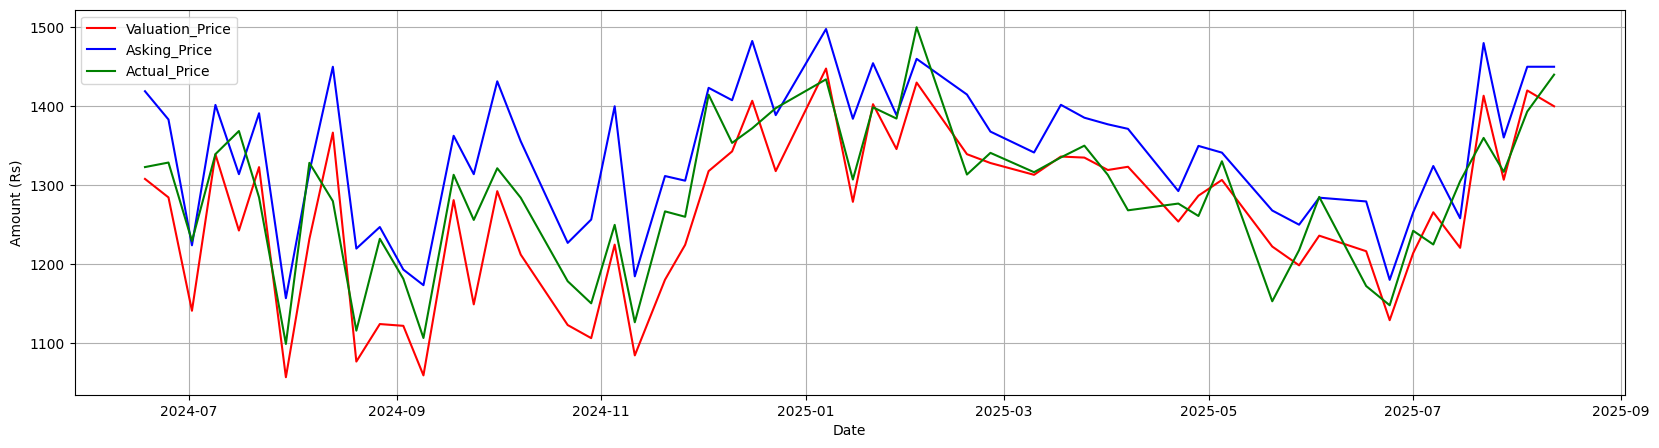

In [72]:
# plotting Valuation_Price , Asking_Price and Actual_Price

plt.figure(figsize=(20,5))
plt.plot(df_avg['Despatch_Date'], df_avg['Valuation_Price'],label = 'Valuation_Price', color = 'red')
plt.plot(df_avg['Despatch_Date'],df_avg['Asking_Price'],label = 'Asking_Price', color = 'blue')
plt.plot(df_avg['Despatch_Date'],df_avg['Actual_Price'],label = 'Actual_Price', color = 'green')
plt.xlabel('Date')
plt.ylabel('Amount (Rs)')
plt.legend(loc='best')
plt.grid()

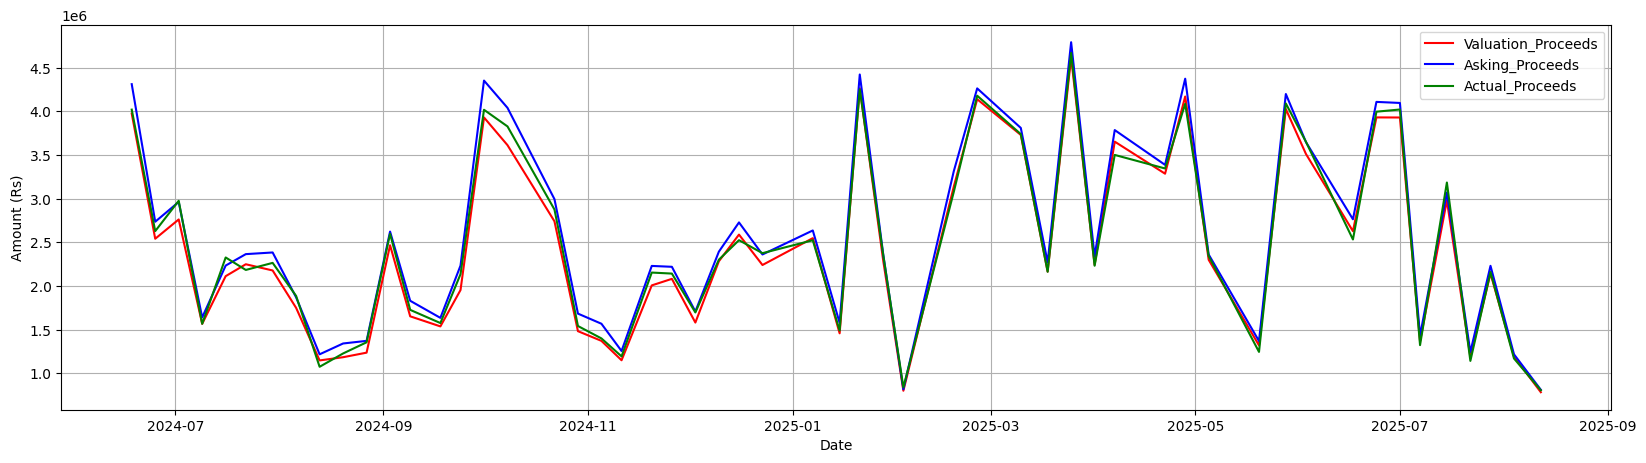

In [73]:
# plotting Valuation_Proceeds , Asking_Proceeds and Actual_Proceeds

plt.figure(figsize=(20,5))
plt.plot(df_avg['Despatch_Date'], df_avg['Valuation_Proceeds'],label = 'Valuation_Proceeds', color = 'red')
plt.plot(df_avg['Despatch_Date'],df_avg['Asking_Proceeds'],label = 'Asking_Proceeds', color = 'blue')
plt.plot(df_avg['Despatch_Date'],df_avg['Actual_Proceeds'],label = 'Actual_Proceeds' , color = 'green')
plt.xlabel('Date')
plt.ylabel('Amount (Rs)')
plt.legend(loc='best')
plt.grid()

#### Time Series Analysis

In [74]:
# seting date column as the index column

df_avg = df_avg.set_index('Despatch_Date')

df_weekly = df_avg.resample(
    rule='W-Tue',        # weekly, anchored to Tuesday
    label='left',        # label interval by its start date
    closed='left',       # include left boundary in interval
    origin='2024-06-18'  # start counting weeks from here
).agg({
    'Valuation_Price': 'mean',
    'Asking_Price': 'mean',
    'Actual_Price': 'mean',
    'Valuation_Quantity': 'sum',
    'Actual_Quantity': 'sum',
    'Valuation_Proceeds': 'sum',
    'Asking_Proceeds': 'sum',
    'Actual_Proceeds': 'sum'
})


In [75]:
# handling missing values

df_weekly = df_weekly.fillna(method = 'ffill')
df_weekly.shape

C:\Users\User\AppData\Local\Temp\ipykernel_23628\584053054.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_weekly = df_weekly.fillna(method = 'ffill')


(61, 8)

In [76]:

df_weekly = df_weekly.mask(df_weekly == 0.0).ffill()
df_weekly.head()

,Valuation_Price,Asking_Price,Actual_Price,Valuation_Quantity,Actual_Quantity,Valuation_Proceeds,Asking_Proceeds,Actual_Proceeds
Despatch_Date,,,,,,,,
2024-06-18,1308.110599,1419.025675,1323.094141,3038.0,3038.0,3974040.0,4311000.0,4019560.0
2024-06-25,1284.732053,1383.265925,1328.837209,1978.0,1978.0,2541200.0,2736100.0,2628440.0
2024-07-02,1141.322314,1224.132231,1229.586777,2420.0,2420.0,2762000.0,2962400.0,2975600.0
2024-07-09,1339.230769,1401.709402,1339.487179,1170.0,1170.0,1566900.0,1640000.0,1567200.0
2024-07-16,1282.941176,1352.647059,1326.705882,3400.0,3400.0,4362000.0,4599000.0,4510800.0


In [77]:
df_weekly['Actual_Proceeds'].mean()

3117445.2459016396

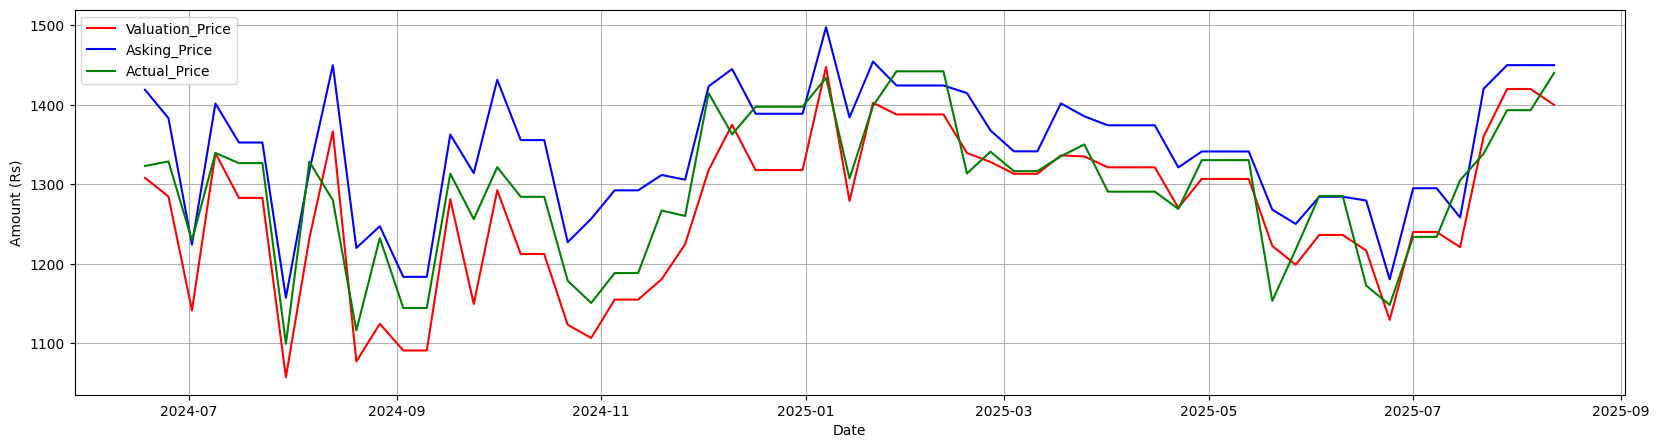

In [78]:
# plotting Valuation_Price , Asking_Price and Actual_Price

plt.figure(figsize=(20,5))
plt.plot(df_weekly['Valuation_Price'],label = 'Valuation_Price', color = 'red')
plt.plot(df_weekly['Asking_Price'],label = 'Asking_Price', color = 'blue')
plt.plot(df_weekly['Actual_Price'],label = 'Actual_Price' , color = 'green')
plt.xlabel('Date')
plt.ylabel('Amount (Rs)')
plt.legend(loc='best')
plt.grid()

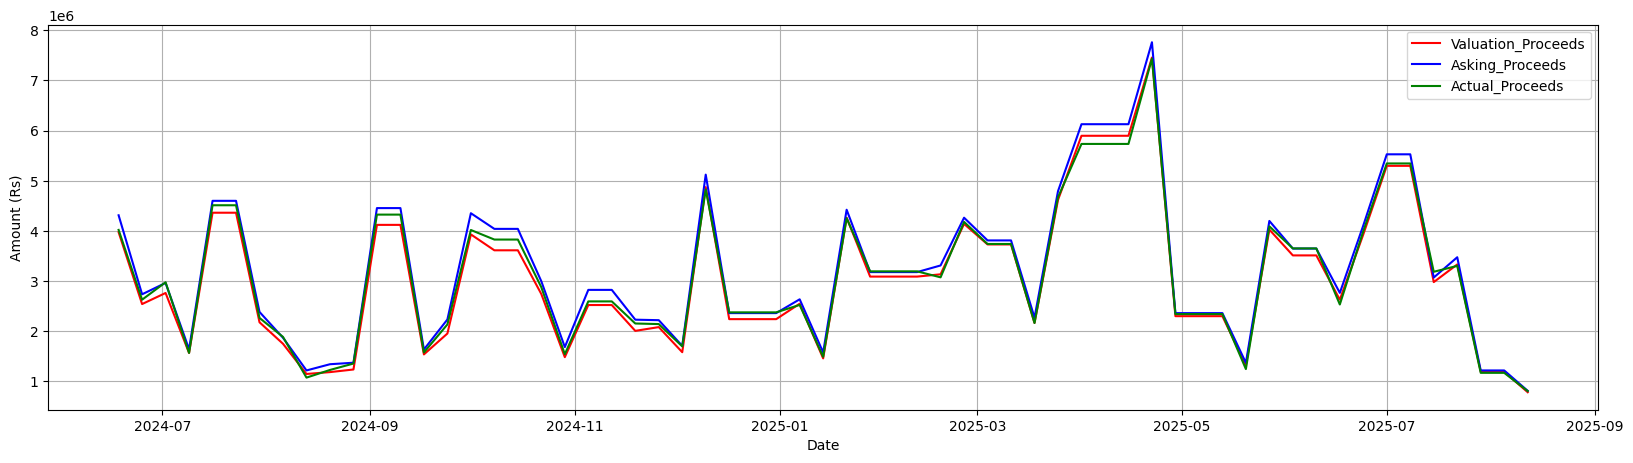

In [79]:
# plotting Valuation_Proceeds , Asking_Proceeds and Actual_Proceeds

plt.figure(figsize=(20,5))
plt.plot(df_weekly['Valuation_Proceeds'],label = 'Valuation_Proceeds', color = 'red')
plt.plot(df_weekly['Asking_Proceeds'],label = 'Asking_Proceeds', color = 'blue')
plt.plot(df_weekly['Actual_Proceeds'],label = 'Actual_Proceeds' , color = 'green')
plt.xlabel('Date')
plt.ylabel('Amount (Rs)')
plt.legend(loc='best')
plt.grid()

##### Stationarity

In [80]:
# function to test stationarity

from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):

    # determining rolling statistics
    rolmean = timeseries.rolling(4).mean()
    rolstd = timeseries.rolling(4).std()

    # plotting rolling statistics
    plt.figure(figsize=(20,5))
    plt.plot(timeseries,label = 'original', color = 'blue')
    plt.plot(rolmean, label = 'Rollin Mean', color ='red')
    plt.plot(rolstd, label =  'Rolling Std', color = 'green')
    plt.xlabel('Date')
    plt.ylabel('Rolling Statistics', size = 15)
    plt.legend()
    plt.grid(True)
    plt.show()

    #dickey fuller test

    print('Results of dickey fuller test:\n')
    adf_test  = adfuller(timeseries, autolag = 'AIC')
    output  = pd.Series(adf_test[0:4], index = ['Test Statistics', 'p-value','No of lags used','No of Observations'])

    for key,value in adf_test[4].items():
        output['critical value(%s)' %key] = value
    print(output)



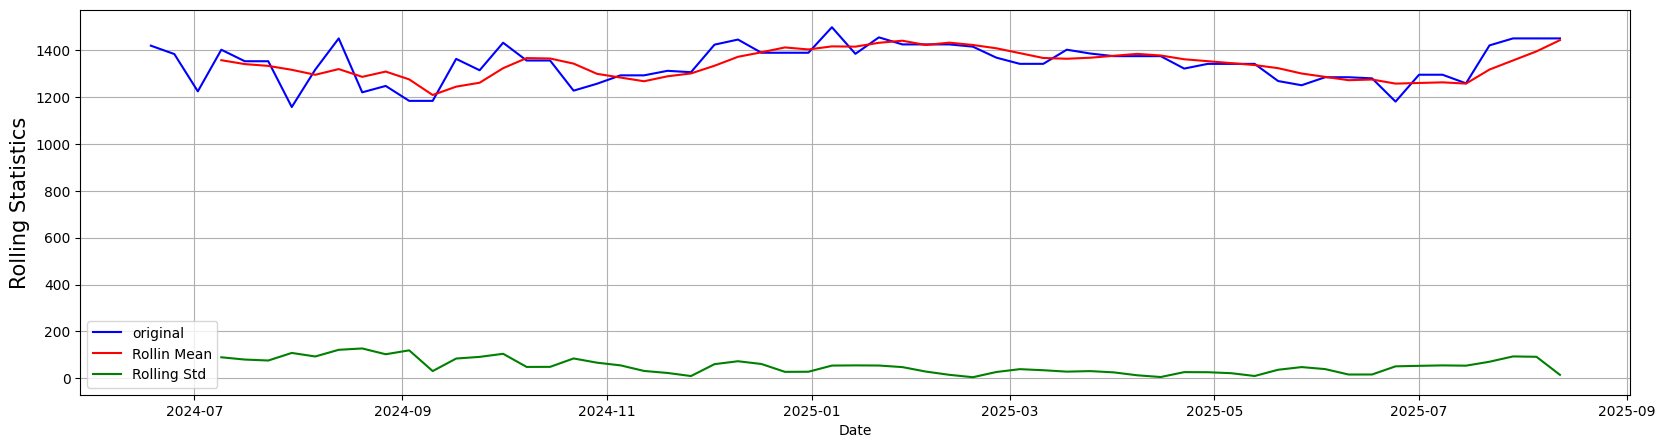

Results of dickey fuller test:

Test Statistics        -4.440635
p-value                 0.000251
No of lags used         0.000000
No of Observations     60.000000
critical value(1%)     -3.544369
critical value(5%)     -2.911073
critical value(10%)    -2.593190
dtype: float64


In [81]:
test_stationarity(df_weekly['Asking_Price'])

p > 0.05 .Therefore, the actual price time series is not stationary.

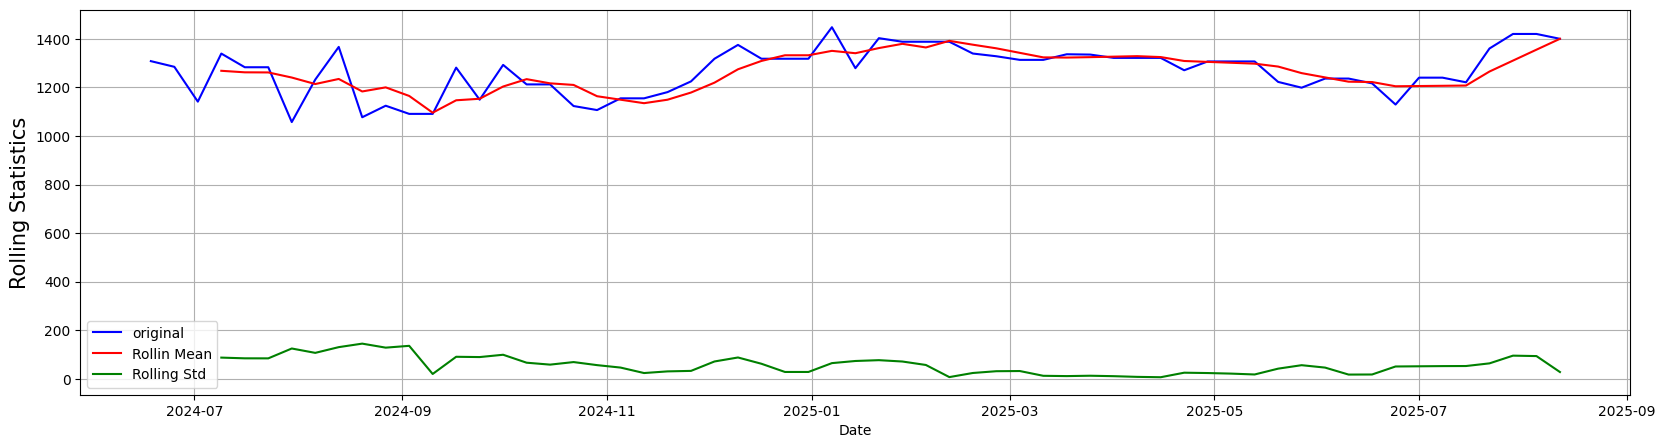

Results of dickey fuller test:

Test Statistics        -2.470637
p-value                 0.122783
No of lags used         1.000000
No of Observations     59.000000
critical value(1%)     -3.546395
critical value(5%)     -2.911939
critical value(10%)    -2.593652
dtype: float64


In [82]:
test_stationarity(df_weekly['Valuation_Price'])

p < 0.05. Therefore, the Valuation_Price time series is stationary.

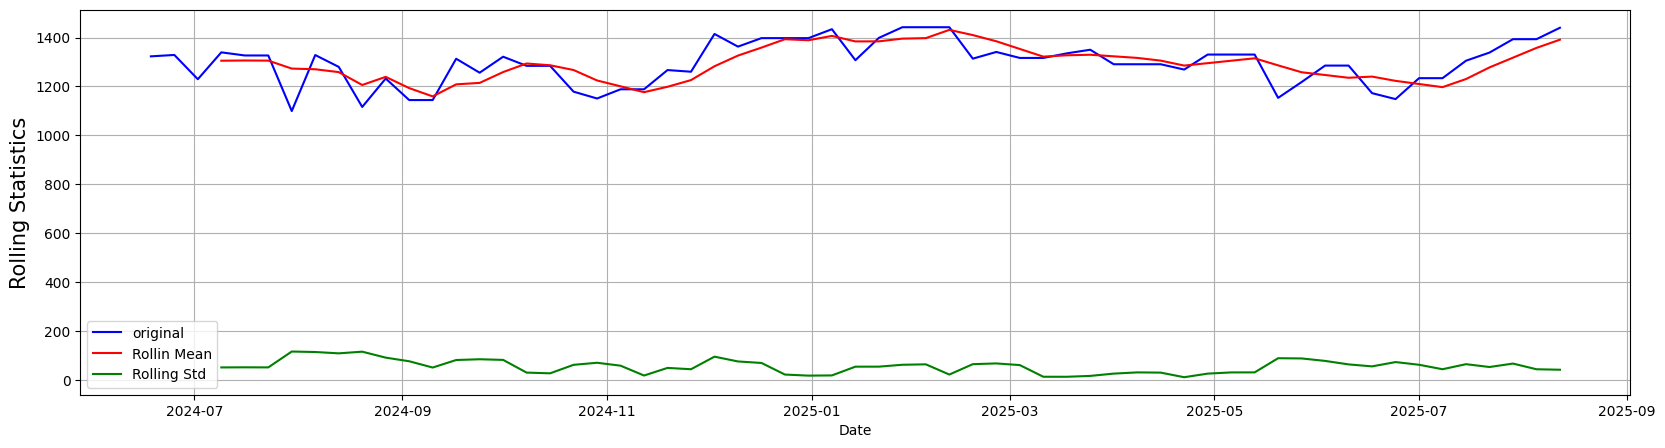

Results of dickey fuller test:

Test Statistics        -3.763608
p-value                 0.003302
No of lags used         0.000000
No of Observations     60.000000
critical value(1%)     -3.544369
critical value(5%)     -2.911073
critical value(10%)    -2.593190
dtype: float64


In [83]:
test_stationarity(df_weekly['Actual_Price'])

p < 0.05. Therefore, the actual price time series is stationary.

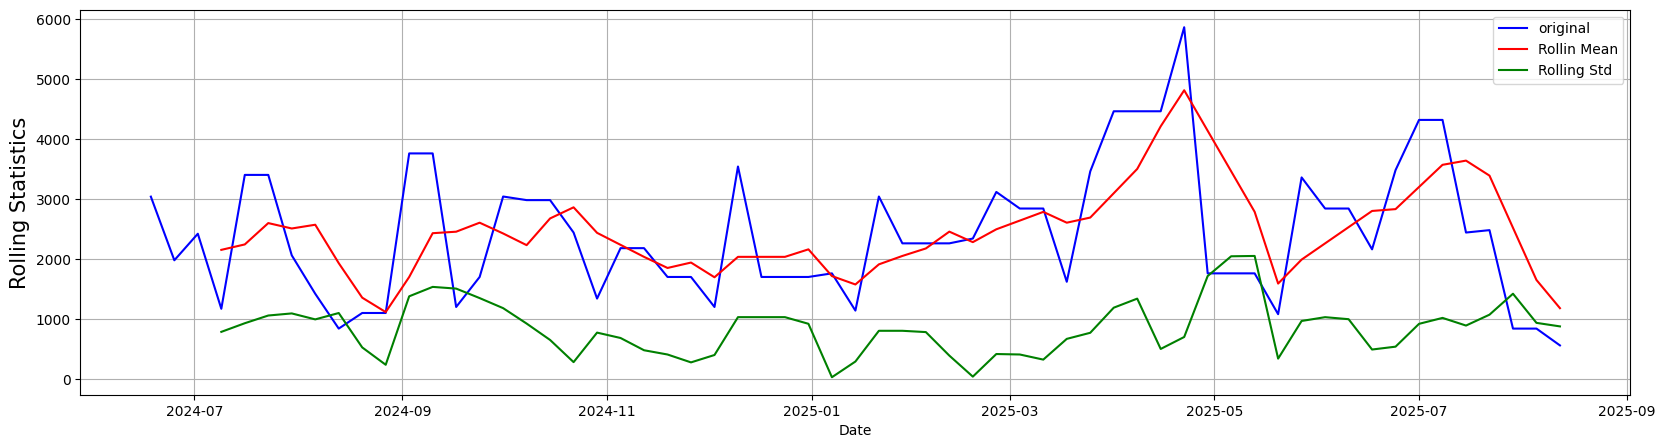

Results of dickey fuller test:

Test Statistics        -4.602445
p-value                 0.000128
No of lags used         0.000000
No of Observations     60.000000
critical value(1%)     -3.544369
critical value(5%)     -2.911073
critical value(10%)    -2.593190
dtype: float64


In [84]:
test_stationarity(df_weekly['Actual_Quantity'])

p < 0.05. Therefore, the actual quantity time series is stationary.

#### Seasonality

<Figure size 640x480 with 0 Axes>

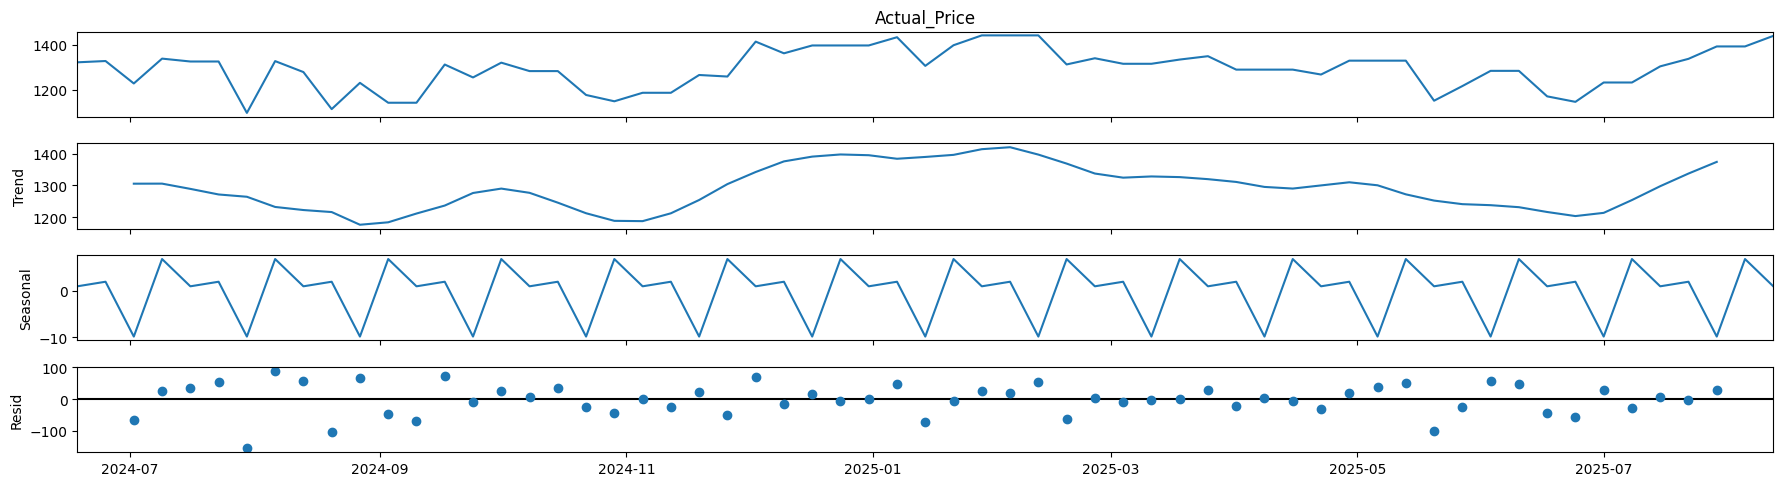

In [85]:
# checking seasonality of prices

from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df_weekly['Actual_Price'], model= 'additive', period= 4)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(20,5)
plt.show()

<Figure size 640x480 with 0 Axes>

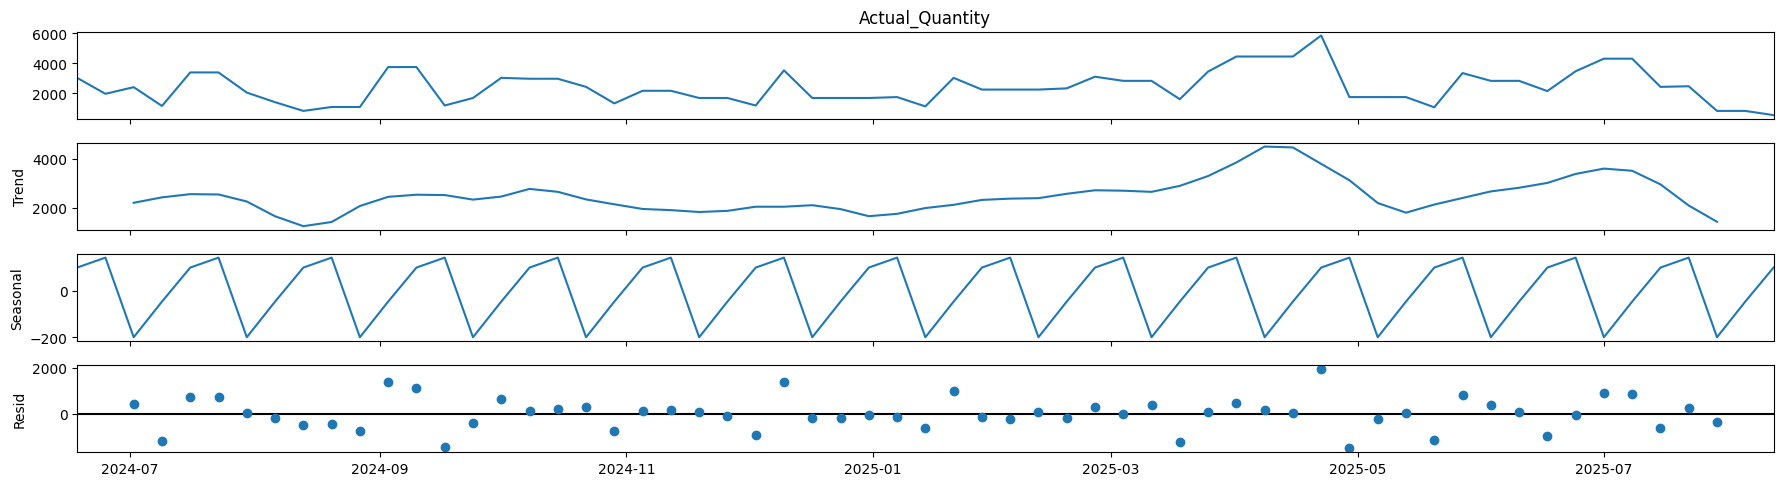

In [86]:
# checking seasonality of quantity

from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df_weekly['Actual_Quantity'], model= 'additive', period= 4)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(20,5)
plt.show()